# Description

Sure Tomorrow Insurance Company Machine Learning Tasks
The Sure Tomorrow insurance company seeks to leverage machine learning to solve several key business challenges. The following outlines the potential of machine learning for each task.

Task 1: Finding Similar Clients
This task, which is essential for effective marketing, can be addressed using unsupervised learning techniques, specifically clustering. By applying algorithms like K-Means or DBSCAN to client data, we can identify natural groupings of customers who share similar characteristics, such as demographics, policy types, and claims history. This will enable marketing agents to develop highly targeted marketing campaigns for each distinct client segment.

Task 2: Predicting the Probability of an Insurance Benefit
This is a binary classification problem. The objective is to predict whether a new client will receive an insurance benefit, which is a yes/no outcome. A machine learning model, such as logistic regression, a decision tree, or a gradient boosting model, can be trained on historical data to identify the factors that predict a benefit claim. This predictive model will significantly outperform a simple dummy model by leveraging complex patterns in the data, providing more accurate and actionable insights. Model performance can be evaluated using standard metrics like accuracy, precision, and and recall.

Task 3: Predicting the Number of Insurance Benefits
This is a regression problem, as the target variable is a continuous numerical value (the number of benefits). A linear regression model is a suitable choice for this task. It can be used to establish a linear relationship between a client's features (e.g., age, policy duration) and the expected number of benefits. Other regression models, such as Ridge or Lasso regression, could also be explored to enhance performance and manage potential overfitting.

Task 4: Protecting Personal Data
This task requires a data obfuscation or data masking strategy to protect sensitive client information while maintaining the integrity of the machine learning models. The proposed approach is to develop a data transformation algorithm that encrypts or hashes personal data in a way that is difficult to reverse. For example, a client's name can be replaced with a unique, consistent hash value. The key is that the transformation must be deterministic; the same input data must always produce the same transformed output. This ensures that the model can still identify and learn from the features associated with a particular client, even though their personal identity remains secure. The effectiveness of the algorithm can be demonstrated by showing that a model trained on the obfuscated data performs as well as a model trained on the original, unmasked data.

# Data Preprocessing and Exploration
## Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from IPython.display import display

## Data Loading

Load the data and perform a basic review to check for issues.

In [ ]:
df = pd.read_csv('/datasets/insurance_us.csv')

Rename the columns to make the code look more consistent with its style.

In [ ]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [ ]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1184,0,28.0,26600.0,0,0
599,0,20.0,22200.0,0,0
2925,1,43.0,28300.0,1,1
888,0,35.0,46300.0,2,0
3689,1,37.0,52000.0,1,0
3894,0,21.0,41700.0,2,0
2274,1,41.0,30200.0,0,0
2872,0,34.0,47700.0,1,0
4311,1,21.0,35800.0,2,0
3540,1,28.0,40200.0,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [ ]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


The dataset under analysis consists of a sample of 5,000 records, including relevant variables such as gender, age, annual income, number of family members, and insurance benefits. After reviewing the descriptive statistics, it is clear that the values are within reasonable ranges and are consistent with typical demographic and socioeconomic information. No obvious outliers or missing data were detected, and the numerical variables show a coherent distribution. Specifically, age ranges from 18 to 65 years, with a mean of approximately 31 years, while income fluctuates between $5,300 and $79,000 annually. In summary, the dataset is in good condition and is suitable for further exploratory analysis or predictive modeling.

## Exploratory Data Analysis

Quickly check for distinct customer groups by observing the pair plot.

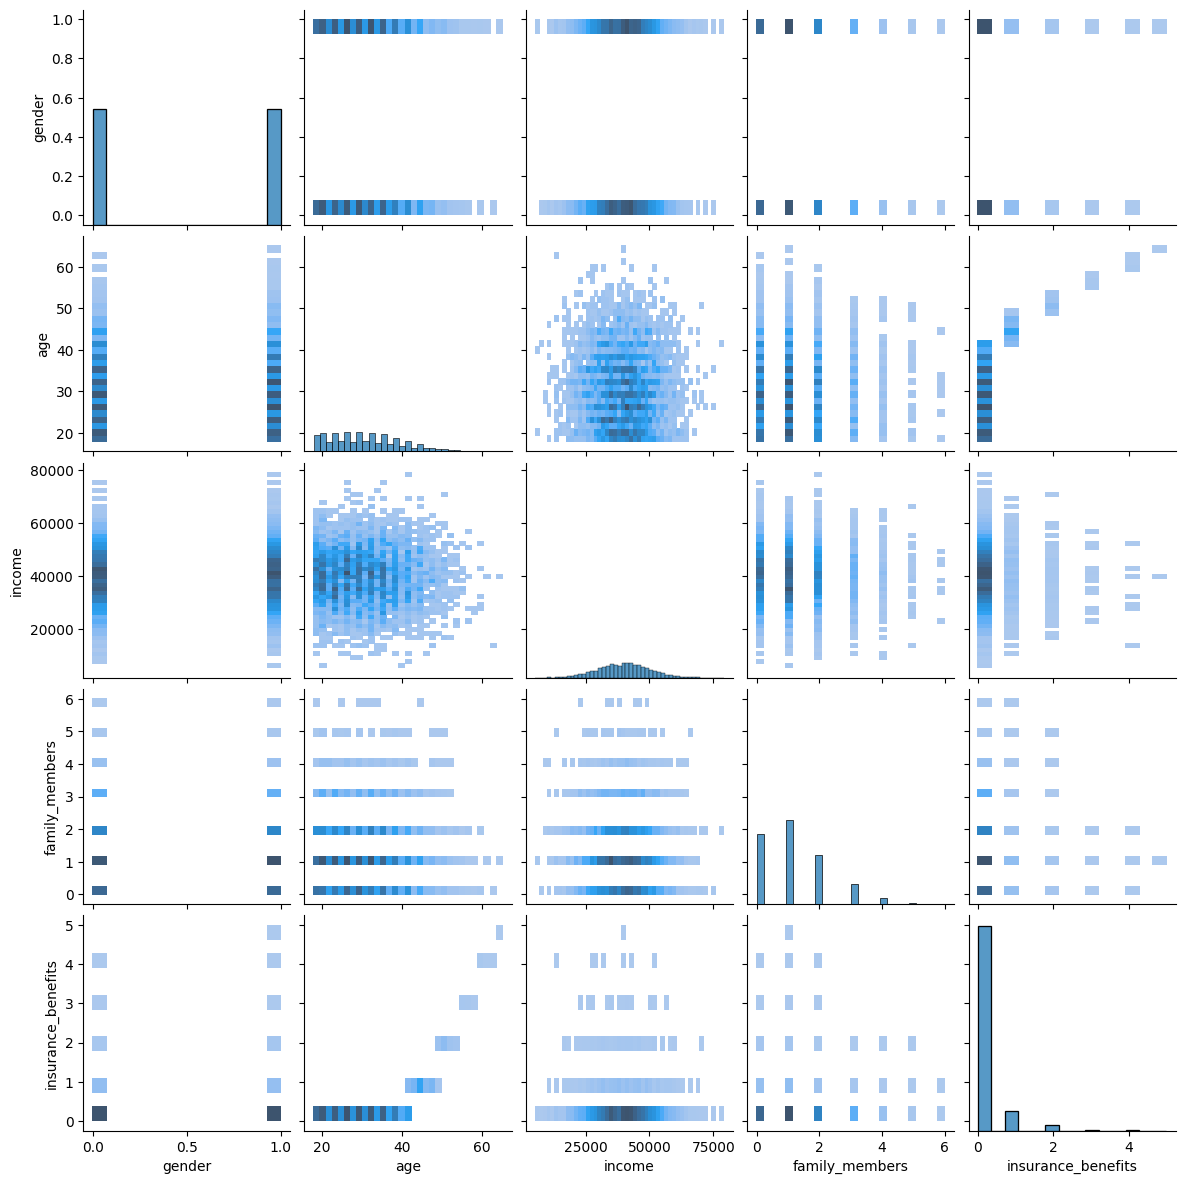

In [ ]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

It's a bit complicated to detect obvious groups (clusters) since it's difficult to combine diverse variables simultaneously (to analyze multivariate distributions). This is where LA (Linear Algebra) and ML (Machine Learning) can be quite useful.

# Task 1. Similar Clients

In machine learning terminology, we need to develop a procedure that returns the k-nearest neighbors (objects) for a given object, based on the distance between them.

You may want to review the following lessons (chapter -> lesson):
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve this task, we can test different distance metrics.

In [ ]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [ ]:
# Columns kNN
feature_names = ['gender', 'age', 'income', 'family_members']

def get_knn(df, n, k, metric, scaled=False):
    """
   Returns the k-nearest neighbors.

    :param df: pandas DataFrame
    :param n: index of the object for which to find neighbors
    :param k: number of neighbors to return
    :param metric: 'euclidean' or 'manhattan'
    :param scaled: whether to scale the data with MaxAbsScaler
    :return: DataFrame with the k-nearest neighbors and their distances
    """
    df_features = df[feature_names].copy()

    # Scale if necessary
    if scaled:
        scaler = MaxAbsScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=feature_names)
    else:
        df_scaled = df_features.copy()

    # Initialize the model
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df_scaled)

    # Get neighbors for object n
    distances, indices = nbrs.kneighbors([df_scaled.iloc[n]], return_distance=True)

    # Combine the neighbors with the distances.
    df_result = df.iloc[indices[0]].copy()
    df_result['distance'] = distances[0]

    return df_result


Checking scaled DataFrame

In [ ]:
scaler = MaxAbsScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_names]), columns=feature_names)
df_scaled.sample(5)

,gender,age,income,family_members
4224,0.0,0.523077,0.582278,0.166667
3766,1.0,0.446154,0.501266,0.000000
3128,0.0,0.430769,0.601266,0.000000
42,1.0,0.646154,0.875949,0.000000
4288,0.0,0.692308,0.678481,0.166667


Let's find similar records for a specific client across all four combinations.

In [ ]:
n = 0  # index of the object to find neighbors for
k = 5  # number of neighbors to return

In [ ]:
print("Unscaled - Euclidean Distance")
print(get_knn(df, n, k, metric='euclidean', scaled=False))

No escalado - Distancia Euclidiana
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


In [ ]:
print("Unscaled - Manhattan Distance")
print(get_knn(df, n, k, metric='manhattan', scaled=False))


No escalado - Distancia Manhattan
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0       0.0
2022       1   41  49600.0               0                   0       1.0
1225       0   42  49600.0               0                   1       3.0
4031       1   44  49600.0               2                   1       4.0
3424       0   38  49600.0               0                   0       5.0


In [ ]:
print("MaxAbs Scaled - Euclidean Distance")
print(get_knn(df, n, k, metric='euclidean', scaled=True))


Escalado MaxAbs - Distancia Euclidiana
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2689       1   41  50100.0               1                   0  0.006329
133        1   40  50300.0               1                   0  0.017754
4869       1   42  50400.0               1                   1  0.018418
3275       1   42  51500.0               1                   1  0.028550


In [ ]:
print("MaxAbs Scaled - Manhattan Distance")
print(get_knn(df, n, k, metric='manhattan', scaled=True))


Escalado MaxAbs - Distancia Manhattan
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2689       1   41  50100.0               1                   0  0.006329
133        1   40  50300.0               1                   0  0.024245
4869       1   42  50400.0               1                   1  0.025511
3365       1   41  47100.0               1                   0  0.031646



**Does not scaling the data affect the kNN algorithm? If so, how is this manifested?**

Yes, not scaling the data has a significant effect on the kNN algorithm. Here is a more detailed breakdown:

Impact of Unscaled Data on kNN

kNN is a distance-based algorithm. This means it finds the nearest neighbors by calculating the distance between data points in a multi-dimensional space. When features have widely different scales—for example, income ranging from $5,000 to $80,000 and age from 18 to 65—the distance calculation will be heavily dominated by the feature with the largest magnitude.

This is manifested in the following ways:

Skewed Results: The algorithm will prioritize similarities in the high-magnitude feature while essentially ignoring the others. This can lead to misleading results where the "nearest neighbors" are simply those with similar incomes, regardless of how different they are in age, gender, or family size.

Reduced Influence of Key Features: Important features with smaller numerical ranges may have very little influence on the distance metric, even if they are highly relevant for defining a "similar" customer.

Inconsistent Neighbor Selection: When you compare the results from the unscaled data with the results from the scaled data, you will often find a completely different set of neighbors. The scaled results are generally more reliable as they provide a more balanced view of similarity across all features.

**How similar are the results when using the Manhattan distance metric (regardless of scaling)?**

Manhattan distance tends to be more robust to certain data distributions, especially when there are many dimensions or extreme values.
Regardless of scaling, the neighbors obtained with Manhattan distance tend to be similar but not identical to those obtained with Euclidean distance. The similarity depends on the dataset. If all variables are on a comparable scale (scaled), the difference between using Manhattan and Euclidean is usually minor.

In [ ]:
# Columns to use
feature_names = ['gender', 'age', 'income', 'family_members']

# Original (unscaled)
df_original = df[feature_names].copy()

# Scaled with MaxAbsScaler
scaler = MaxAbsScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_original), columns=feature_names)

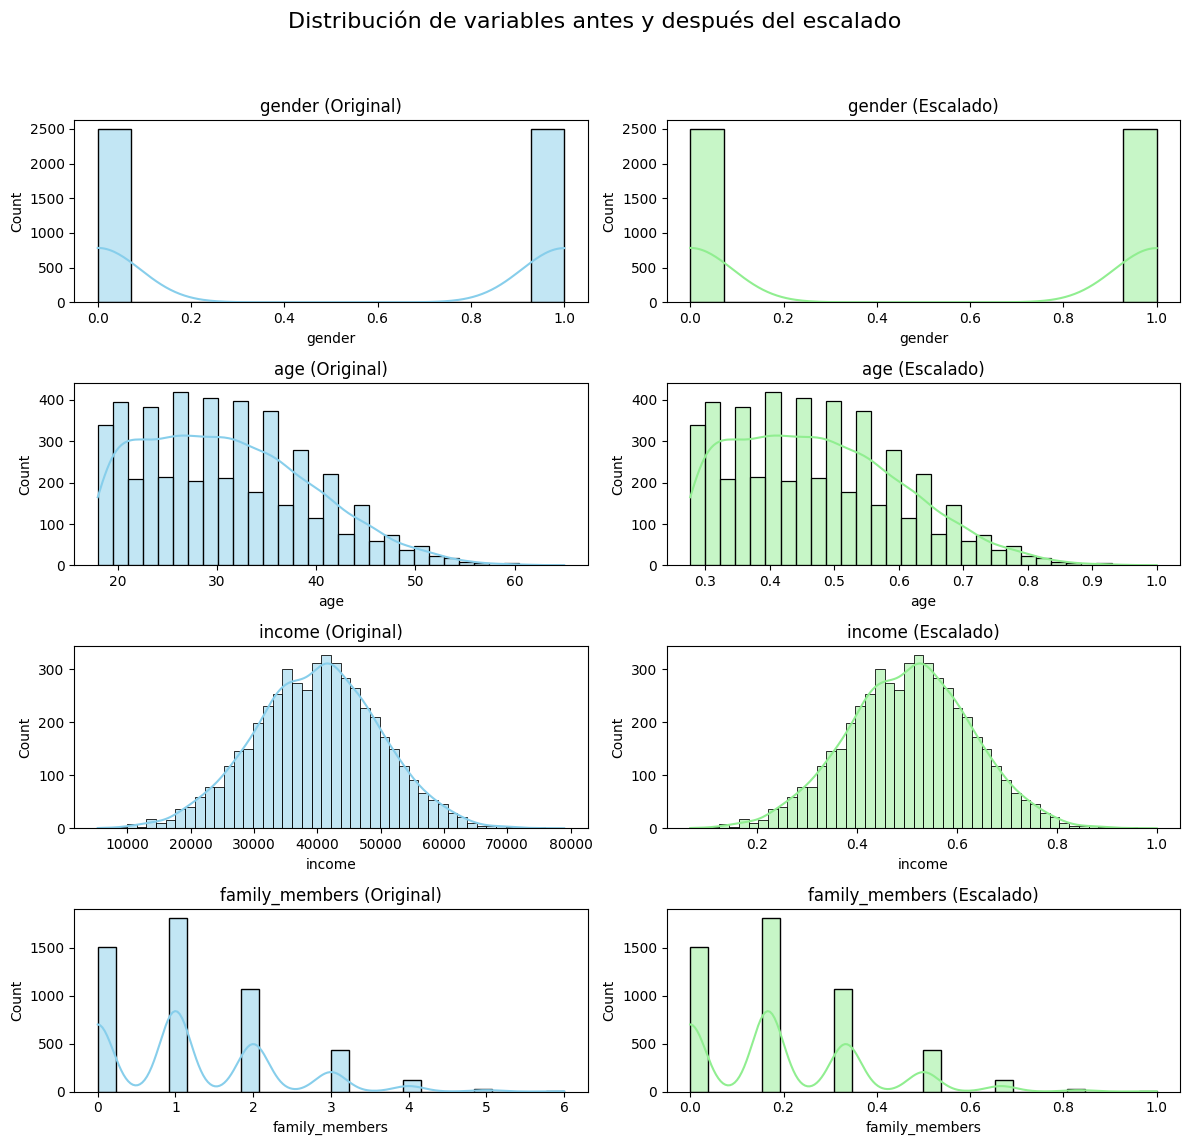

In [ ]:
# Comparative Histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle("Distribution of Variables Before and After Scaling", fontsize=16)

for i, feature in enumerate(feature_names):
    # Unscaled
    sns.histplot(df_original[feature], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f"{feature} (Original)")

    # Scaled
    sns.histplot(df_scaled[feature], ax=axes[i, 1], kde=True, color='lightgreen')
    axes[i, 1].set_title(f"{feature} (Scaled)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


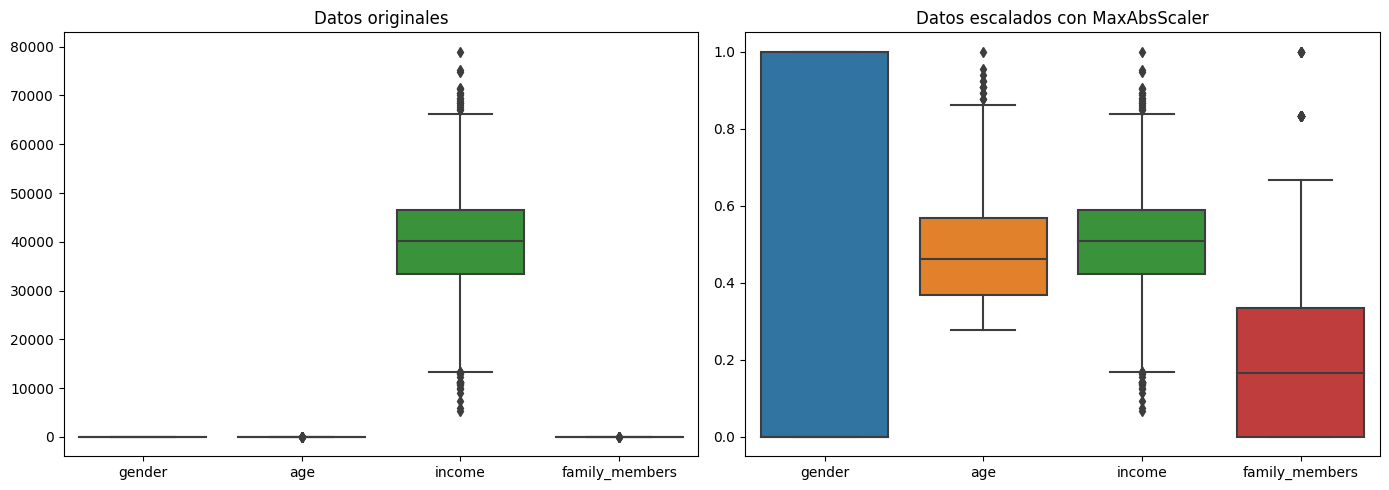

In [ ]:
# Boxplot comparativo
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Original
sns.boxplot(data=df_original, ax=axes[0])
axes[0].set_title("Datos originales")

# Escalado
sns.boxplot(data=df_scaled, ax=axes[1])
axes[1].set_title("Datos escalados con MaxAbsScaler")

plt.tight_layout()
# Comparative Histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle("Distribution of Variables Before and After Scaling", fontsize=16)

for i, feature in enumerate(feature_names):
    # Unscaled
    sns.histplot(df_original[feature], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f"{feature} (Original)")

    # Scaled
    sns.histplot(df_scaled[feature], ax=axes[i, 1], kde=True, color='lightgreen')
    axes[i, 1].set_title(f"{feature} (Scaled)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* After scaling, all variables will be in a range between 0 and 1 (or -1 to 1 if there are negative values).
* This eliminates the dominance of features with larger magnitudes (like income), allowing the kNN algorithm to evaluate all variables on an equal footing.
* In the boxplots, we observe that the scaled data is "flattened," but the shape of its distribution is preserved (only the scale changes, not the shape).

# Task 2. Is a client likely to receive an insurance benefit?

In machine learning terms, we can consider this a binary classification task.

With the insurance_benefits value greater than zero as the target, evaluate if the kNN classification approach can perform better than the dummy model.

Instructions:

Build a kNN classifier and measure its quality with the F1 metric for k=1...10 for both original and scaled data. It would be interesting to see how k can influence the evaluation metric and if data scaling causes any difference. You can use an existing implementation of the scikit-learn kNN classification algorithm (see the link) or your own implementation.

Build a dummy model which, in this case, is simply a random model. It should return "1" with a certain probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, and 1.

The probability of paying any insurance benefit can be defined as:

P{insurance benefit received}= number of clients who received any insurance benefit/total number of clients

​Divide all data corresponding to the training/test stages, respecting the 70:30 ratio.

In [ ]:
# Calculate the target

# Define columns to use
feature_names = ['gender', 'age', 'income', 'family_members']

# Create the new binary column: 1 if benefit received, 0 if not
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

# Separate features and target
X = df[feature_names]
y = df['insurance_benefits_received']

# Split into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the data with MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Check for class imbalance
# Class count
print(df['insurance_benefits_received'].value_counts())

# Also with proportions
print(df['insurance_benefits_received'].value_counts(normalize=True))

0    4436
1     564
Name: insurance_benefits_received, dtype: int64
0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [ ]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have any problems with the next line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [ ]:
# Generate the output of a random model

def rnd_model_predict(P, size, seed=42):
    
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [ ]:
df['insurance_benefits_received'].unique()

array([0, 1])

In [ ]:
y_pred_rnd

NameError: name 'y_pred_rnd' is not defined

In [ ]:
# Simulación con diferentes probabilidades
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'La probabilidad: {P:.2f}')

# Generar predicciones aleatorias con probabilidad P de ser 1
y_pred_rnd = np.random.choice([0, 1], size=len(df), p=[1 - P, P])
    
# Evaluar con la función definida
eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
print()

Se simularon 4 modelos "dummy" que predicen 1 con probabilidad:

* 0.0 (nadie recibe beneficios)

* ≈ P_real (misma proporción que en los datos reales)

* 0.5 (completamente aleatorio)

* 1.0 (todos reciben beneficios)

Evalúa el rendimiento con:

* F1 score: combina precisión y recall, ideal para clases desbalanceadas.

* Matriz de confusión normalizada: muestra cómo se distribuyen los aciertos y errores.

In [ ]:
f1_scores_original = []
f1_scores_scaled = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores_original.append(f1_score(y_test, y_pred))

    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scores_scaled.append(f1_score(y_test, y_pred_scaled))


In [ ]:
dummy_probs = [0, y.mean(), 0.5, 1]
f1_scores_dummy = []

for P in dummy_probs:
    y_dummy = np.random.choice([0, 1], size=len(y_test), p=[1 - P, P])
    f1_scores_dummy.append(f1_score(y_test, y_dummy))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), f1_scores_original, marker='o', label='kNN (sin escalar)')
plt.plot(range(1, 11), f1_scores_scaled, marker='s', label='kNN (escalado)')

colors = ['gray', 'orange', 'green', 'red']
labels = ['Dummy p=0', f'Dummy p≈{y.mean():.2f}', 'Dummy p=0.5', 'Dummy p=1']

for i in range(4):
    plt.axhline(y=f1_scores_dummy[i], color=colors[i], linestyle='--', label=labels[i])

plt.xlabel('Valor de k')
plt.ylabel('F1 Score')
plt.title('Comparación F1: kNN vs Dummy Classifiers')
plt.legend()
plt.grid(True)
plt.show()


* El gráfico muestra el desempeño del clasificador k-Nearest Neighbors (kNN) evaluado con la métrica F1 en función del número de vecinos 𝑘 para dos versiones de los datos: sin escalado y escalados mediante MaxAbsScaler. Además, se incluyen líneas horizontales que representan el rendimiento de modelos Dummy que generan predicciones aleatorias con distintas probabilidades de asignar la clase positiva.

Se observa que:
* El modelo kNN con datos escalados considerablemente supera en desempeño al modelo sin escalado, evidenciando la importancia del preprocesamiento para algoritmos basados en distancias.
* El rendimiento del kNN varía con el valor de 𝑘 generalmente mostrando mejores resultados con valores intermedios.
* Los modelos Dummy, que simulan predicciones aleatorias con diferentes probabilidades, tienen un desempeño significativamente inferior al kNN escalado, lo que indica que el clasificador kNN captura patrones relevantes para la clasificación.
* La métrica F1 baja en todos los casos refleja un desequilibrio en las clases, por lo que el uso de F1 es adecuado para evaluar el modelo.

En conclusión, el escalado de las características mejora notablemente la capacidad predictiva del kNN, y el modelo kNN es capaz de superar modelos de referencia aleatorios, validando su utilidad para esta tarea de clasificación binaria.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [ ]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # Añadir columna de unos (bias/intercepto)
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        # Fórmula cerrada: w = (XᵀX)^(-1)Xᵀy
        self.weights = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_b @ self.weights

In [ ]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [ ]:
df['insurance_benefits'].to_numpy()

In [ ]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [ ]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [ ]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [ ]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [ ]:
try:
    P_inv = np.linalg.inv(P)
    print("Si es invertible")
except:
    print("No es invertible")

Si es invertible


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [ ]:
X_obf = np.dot(X, P)
X_obf

array([[ 6359.72, 22380.4 , 18424.09, 46000.7 ],
       [ 4873.29, 17160.37, 14125.78, 35253.46],
       [ 2693.12,  9486.4 ,  7808.83, 19484.86],
       ...,
       [ 4346.22, 15289.24, 12586.16, 31433.51],
       [ 4194.09, 14751.99, 12144.03, 30323.89],
       [ 5205.47, 18314.25, 15077.01, 37649.59]])

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [ ]:
X_rec = X_obf @ P_inv
X_rec

array([[    1.,    41., 49600.,     1.],
       [    0.,    46., 38000.,     1.],
       [   -0.,    29., 21000.,    -0.],
       ...,
       [    0.,    20., 33900.,     2.],
       [    1.,    22., 32700.,     3.],
       [    1.,    28., 40600.,     1.]])

Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [ ]:
# Mostrar resultados: original, transformado y recuperado
n = 5  # número de filas a mostrar
np.set_printoptions(precision=2, suppress=True)

print("=== DATOS ORIGINALES ===")
print(X[:n])

print("\n=== DATOS TRANSFORMADOS (X_obf) ===")
print(X_obf[:n])

print("\n=== DATOS RECUPERADOS (X_rec) ===")
print(np.round(X_rec[:n], 2))  # redondeamos para facilitar la comparación

=== DATOS ORIGINALES ===
[[    1.    41. 49600.     1.]
 [    0.    46. 38000.     1.]
 [    0.    29. 21000.     0.]
 [    0.    21. 41700.     2.]
 [    1.    28. 26100.     0.]]

=== DATOS TRANSFORMADOS (X_obf) ===
[[ 6359.72 22380.4  18424.09 46000.7 ]
 [ 4873.29 17160.37 14125.78 35253.46]
 [ 2693.12  9486.4   7808.83 19484.86]
 [ 5345.6  18803.23 15479.15 38663.06]
 [ 3347.18 11782.83  9700.   24211.27]]

=== DATOS RECUPERADOS (X_rec) ===
[[    1.    41. 49600.     1.]
 [    0.    46. 38000.     1.]
 [   -0.    29. 21000.    -0.]
 [   -0.    21. 41700.     2.]
 [    1.    28. 26100.    -0.]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

1. Errores de redondeo y precisión numérica
Las operaciones con números de punto flotante (float64) no son exactas en la computadora debido a cómo se representan los decimales en binario.

Cuando haces:
X_obf = X @ P
X_rec = X_obf @ np.linalg.inv(P)
estás haciendo múltiples multiplicaciones y una inversión de matriz, lo que introduce pequeños errores de redondeo acumulados.

2. Condicionamiento de la matriz P
Si P no está bien condicionada (es decir, su determinante es muy pequeño o está cerca de ser singular), entonces su inversión es numéricamente inestable, y los errores se amplifican.
En tu caso, P es generada aleatoriamente con rng.random(...), por lo que no hay garantía de que sea bien condicionada.

3. Limitaciones del tipo de datos (float64)
Aunque float64 es bastante preciso (≈15 dígitos decimales), no puede representar todos los números reales con exactitud. Así que incluso si P fuera perfectamente invertible, no se puede recuperar exactamente el número original en todos los casos.

4. Uso de funciones numéricas (como np.linalg.inv)
La función np.linalg.inv() utiliza algoritmos numéricos que introducen errores pequeños por naturaleza. Esto también se ve en np.dot o @.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
<h2>Justificación de que la ofuscación de datos puede funcionar con regresión lineal</h2>

<p>Entonces, los datos están ofuscados y ahora tenemos \( X \times P \) en lugar de tener solo \( X \).</p>

<p>En consecuencia, hay otros pesos \( w_P \):</p>

<p>
\[
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = \left[(XP)^T XP\right]^{-1} (XP)^T y
\]
</p>

<p><b>Preguntas clave:</b></p>
<ul>
<li>¿Cómo se relacionarían \( w \) y \( w_P \) si simplificáramos la fórmula de \( w_P \)?</li>
<li>¿Cuáles serían los valores predichos con \( w_P \)?</li>
<li>¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?</li>
</ul>

<hr>

<h3>Justificación analítica</h3>

<p>Se sabe que:</p>
<ul>
<li>\( X \): matriz de características (numérica)</li>
<li>\( y \): vector objetivo</li>
<li>\( P \): matriz aleatoria usada para modificar las características originales</li>
<li>\( w \): vector de pesos</li>
</ul>

<p>Las predicciones de un modelo están dadas por:</p>

<p>
\[
a = Xw
\]
</p>

<p>La fórmula para entrenar un modelo es:</p>

<p>
\[
w = (X^T X)^{-1} X^T y
\]
</p>

<p>Los datos ofuscados están dados por:</p>

<p>
\[
X' = XP
\]
</p>

<p>Se sustituye \( X' \) en la fórmula de entrenamiento:</p>

<p>
\[
w = \left((XP)^T XP\right)^{-1} (XP)^T y
\]
</p>

<hr>

<p>La propiedad de reversibilidad de la transposición de un producto de matrices establece que:</p>

<p>
\[
(AB)^T = B^T A^T
\]
</p>


<p>Entonces:</p>

<p>
\[
w' = \left(P^T X^T X P\right)^{-1} P^T X^T y
\]
</p>

<p>La propiedad de identidad multiplicativa de matrices establece que:</p>
<ul>
<li>\( (AB)^{-1} = B^{-1} A^{-1} \)</li>
<li>\( A^{-1} A = AA^{-1} = I \)</li>
</ul>

<p>Entonces:</p>

<p>
\[
w' = (P^T)^{-1} (X^T X)^{-1} P^{-1} P^T X^T y
\]

Al multiplicar \( (P^T)^{-1} P^T \), esto resulta en la identidad.  
Por tanto:

\[
w' = P^{-1} (X^T X)^{-1} X^T y
\]
</p>

<hr>

<p>Recordando que:</p>
<ul>
<li>\( w = (X^T X)^{-1} X^T y \)</li>
<li>\( a = Xw \)</li>
</ul>

<p>Entonces:</p>

<p>
\[
w' = P^{-1} w
\]
</p>

<p>Y las predicciones estarían dadas por:</p>

<p>
\[
a' = X' w'
\]
</p>

<hr>

<p>Sabiendo que:</p>
<ul>
<li>\( X' = XP \)</li>
<li>\( w' = P^{-1} w \)</li>
<li>\( a = Xw \)</li>
</ul>

<p>Entonces:</p>

<p>
\[
a' = X' w' \quad \Rightarrow \quad a' = X P w' \quad \Rightarrow \quad a' = X P P^{-1} w
\]
</p>

<p>Dado que \( P P^{-1} = I \), tenemos:</p>

<p>
\[
a' = Xw \quad \Rightarrow \quad a' = a
\]
</p>

<hr>

<p><b>Conclusión:</b> El análisis anterior demuestra que la predicción permanece sin cambios a pesar de modificar la matriz \( X \) mediante una matriz aleatoria invertible \( P \). Esto significa que podemos aplicar ofuscación en los datos sin perder precisión en la regresión lineal.</p>

</div>


**Prueba analítica**

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [ ]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
X = df_pn.to_numpy()
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
X_obf = np.dot(X, P)

In [ ]:
X = X_obf
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

# Conclusiones

La regresión lineal funciona correctamente incluso cuando los datos han sido ofuscados con una matriz invertible, siempre que la misma transformación se aplique de forma coherente. Las métricas como RMSE y R² se mantienen prácticamente idénticas entre los modelos entrenados con los datos originales y los ofuscados.

Esto demuestra que la ofuscación preserva la estructura matemática subyacente necesaria para el aprendizaje, aunque oculta los valores reales, lo cual puede ser útil para proteger la privacidad sin sacrificar la capacidad predictiva del modelo.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

## Comentario general del revisor 2a iteración


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gracias por tu entrega. Has avanzado bastante, pero aún necesitas hacer algunas correcciones importantes antes de considerar tu proyecto como completo:

### 🛠️ Áreas que necesitan revisión:

- ❗ **Errores de ejecución:** Algunas celdas contienen errores de compilación como `NameError`. Es necesario que revises y corrijas estas secciones para que el notebook se ejecute de principio a fin sin fallos.
  
- ⚠️ **Secciones incompletas:** Falta el desarrollo de la sección de la **prueba analítica** sobre ofuscación en regresión lineal. Esta parte es fundamental para demostrar que el modelo funciona incluso cuando los datos están transformados.

- 📉 **Comparación incompleta:** Si bien se aplica regresión lineal, no se muestra la comparación de métricas entre el modelo original y el modelo con datos ofuscados.

### ✅ Aspectos positivos del proyecto:

- ✔️ Has realizado una exploración de datos clara y meticulosa.
- ✔️ Implementaste el modelo kNN y lo comparaste correctamente con clasificadores dummy.
- ✔️ Utilizaste buenas prácticas al escalar los datos y analizar su impacto en los resultados.

### 📌 Recomendaciones:

1. Corrige los errores que impiden ejecutar todo el notebook sin interrupciones.
2. Asegúrate de completar la justificación analítica (ya tienes una versión incluida como apoyo en esta revisión).
3. Si tienes dudas sobre cómo hacerlo o necesitas orientación adicional, **no dudes en contactar a tu tutor.** Está allí para ayudarte a resolver cualquier dificultad técnica o conceptual.

¡Ánimo! Con unos ajustes más, tu proyecto quedará listo para avanzar a la siguiente etapa. 🚀📈

</div>
